In [1]:
import pandas as pd

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_json('./ultimate_data_challenge.json')
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [3]:
data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [4]:
# Remove duplicates
data = data.drop_duplicates()
len(data)

49992

In [5]:
# Remove rows with missing values
data = data.dropna()
data


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7
49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,False,25.0,2.25,4.5
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0


In [6]:
data[data['last_trip_date']>='2014-06-01']

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
13,King's Landing,0,2014-01-29,4.0,1.38,2014-06-08,iPhone,50.0,False,50.0,3.04,5.0
16,King's Landing,1,2014-01-11,5.0,1.00,2014-06-28,Android,0.0,True,50.0,10.86,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49976,King's Landing,0,2014-01-21,2.0,1.00,2014-07-01,iPhone,0.0,False,100.0,2.39,4.0
49988,King's Landing,1,2014-01-20,4.5,1.00,2014-06-14,iPhone,0.0,False,50.0,2.53,5.0
49991,Winterfell,0,2014-01-08,5.0,1.25,2014-06-29,iPhone,100.0,False,0.0,1.06,5.0
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7


In [7]:
17035/41440

0.4110762548262548

In [8]:
data['active'] = ((pd.to_datetime(data['last_trip_date']) - pd.to_datetime(data['signup_date'])) / np.timedelta64(1, 'M')).map(lambda x: 1 if x>5 else 0)
data


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7,1
49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,False,25.0,2.25,4.5,0
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0


In [9]:
data['active'].value_counts()

0    31098
1    10342
Name: active, dtype: int64

In [10]:
10342/len(data)

0.24956563706563706

In [11]:
data["ultimate_black_user"] = data["ultimate_black_user"].astype(int)
data

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,1,55.6,2.53,4.7,1
49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,0,25.0,2.25,4.5,0
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,0,100.0,5.63,4.2,0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,1,100.0,3.86,5.0,0


In [33]:
city_values = {"King's Landing": 1, 'Astapor': 2, 'Winterfell': 3}

data['city'] = data['city'].replace(city_values)

In [34]:

df = pd.get_dummies(data, columns=['city', 'phone'])

df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,city_1,city_2,city_3,phone_Android,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,0,1,0,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,0,0,1,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,0,1,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,1,1,0,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,0,0,1,1,0


In [41]:
features = ['trips_in_first_30_days', 'avg_rating_of_driver','ultimate_black_user','weekday_pct','avg_surge','surge_pct','ultimate_black_user','weekday_pct','avg_dist','avg_rating_by_driver','city_1','city_2','city_3','phone_Android','phone_iPhone']
target = ['active']
X = df[features]
y = df[target]


In [43]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)

In [44]:
X.shape, X_pca.shape

((41440, 15), (41440, 5))

In [47]:
pca.components_ 

array([[-4.55787056e-03, -1.62972690e-04, -3.59843476e-04,
        -7.05483454e-01,  5.57400028e-04,  6.66606727e-02,
        -3.59843476e-04, -7.05483454e-01, -1.10020982e-02,
        -1.46569180e-04, -2.65684666e-04,  1.15002992e-04,
         1.50681674e-04,  3.40026114e-05, -3.40026114e-05],
       [ 3.93611497e-03,  1.39105748e-05, -2.55559579e-03,
         4.73340319e-02,  8.61728642e-03,  9.97279735e-01,
        -2.55559579e-03,  4.73340319e-02, -2.90182778e-02,
         5.05790162e-04,  9.74793179e-04,  1.13157003e-03,
        -2.10636321e-03, -3.95405291e-04,  3.95405291e-04],
       [-2.73389177e-01,  4.21812197e-03, -1.10720110e-03,
        -5.21851284e-03,  3.71283435e-04,  2.95385076e-02,
        -1.10720110e-03, -5.21851284e-03,  9.61371078e-01,
         7.10048312e-03,  1.76513853e-03, -1.91061646e-03,
         1.45477933e-04,  3.11718584e-03, -3.11718584e-03],
       [ 9.61553480e-01, -9.65867365e-05,  1.50162619e-02,
        -5.02206480e-03, -1.57690269e-04,  4.73031682

In [49]:
#http://www.jamesloach.com/python/sklearn_pca_to_dataframe.html
from pandas import DataFrame
columns = ['pca_%i' % i for i in range(5)]
df_pca = DataFrame(X_pca, columns=columns, index=df.index)
df_pca.head()

,pca_0,pca_1,pca_2,pca_3,pca_4
0,21.691436,5.113295,-1.751289,1.052748,-1.073827
1,15.271983,-10.030393,3.266409,-1.702953,0.631864
2,-55.207584,-5.067054,-5.285466,-1.356341,0.172908
3,-25.700930,12.958549,-4.595642,5.184937,-0.970060
4,-29.663864,5.007062,-5.483593,10.102989,1.278391


<AxesSubplot:ylabel='Frequency'>

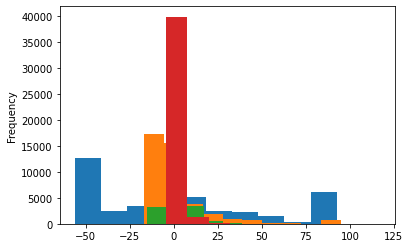

In [53]:
df_pca['pca_0'].plot(kind='hist')
df_pca['pca_1'].plot(kind='hist')
df_pca['pca_2'].plot(kind='hist')
df_pca['pca_3'].plot(kind='hist')

In [54]:
from sklearn.preprocessing import MinMaxScaler
# build the scaler model
scaler = MinMaxScaler()
# fit using the train set
scaler.fit(df_pca)
# transform the test test
X_scaled = scaler.transform(df_pca)
# Verify minimum value of all features
X_scaled.min(axis=0)
# array([0., 0., 0., 0.])

array([0., 0., 0., 0., 0.])

In [55]:
# Verify maximum value of all features
X_scaled.max(axis=0)
# array([1., 1., 1., 1.])

array([1., 1., 1., 1., 1.])

In [57]:
df = pd.DataFrame(X_scaled)

In [58]:
df

,0,1,2,3,4
0,0.523116,0.196308,0.324190,0.045526,0.104345
1,0.479929,0.060439,0.370713,0.022779,0.628274
2,0.005781,0.104970,0.291422,0.025640,0.487299
3,0.204286,0.266696,0.297818,0.079634,0.136218
4,0.177625,0.195355,0.289585,0.120229,0.826865
...,...,...,...,...,...
41435,0.432079,0.166080,0.314426,0.033977,0.091746
41436,0.734469,0.376379,0.327192,0.020794,0.442407
41437,0.005510,0.103594,0.342355,0.012901,0.479356
41438,0.005639,0.103978,0.326653,0.009085,0.364967


In [61]:
#Split into  train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [62]:
# Lets try random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rfc = RandomForestClassifier(criterion = 'gini', random_state = 42)
rfc.fit(X_train, y_train)

# Evaluating on Training set
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(y_train,rfc_pred_train))

/Users/Amulya/anaconda2/envs/py365/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training Set Evaluation F1-Score=> 0.9970304917795322


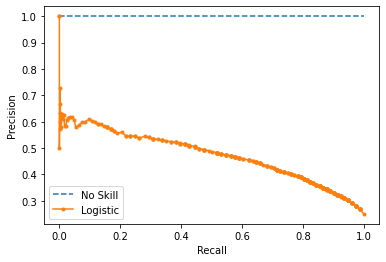

In [63]:
yhat = rfc.predict_proba(X_test)


# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [64]:
# Evaluating on Test set
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(y_test,rfc_pred_test))

Testing Set Evaluation F1-Score=> 0.42182839094577995


In [65]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, rfc_pred_test)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.5207361562992796


In [66]:
from sklearn.model_selection import GridSearchCV
params = { 
    'n_estimators': [100, 200, 300, 400, 600, 800],
    'max_depth': [4,6,8,10],
    'max_features': ['log2','sqrt', 'auto']
}
grid_search = GridSearchCV(rfc, param_grid=params)
grid_search.fit(X_train, y_train)

best = grid_search.best_estimator_
print("Best values for parameters: ", grid_search.best_params_)
print("Best score with these parameters: ", grid_search.best_score_)

best_grid = grid_search.best_estimator_
best_grid

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarni

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarni

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarni

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarni

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarni

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarni

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarni

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarni

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarni

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarni

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarni

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarni

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarni

Best values for parameters:  {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 400}
Best score with these parameters:  0.77737366176914


RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=400,
                       random_state=42)

In [67]:
# Fit with best parameters
best_rf_grid = best_grid.fit(X_train, y_train)
best_rf_predictions = best_rf_grid.predict(X_test)

/Users/Amulya/anaconda2/envs/py365/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [68]:
precision, recall, thresholds = precision_recall_curve(y_test, best_rf_predictions)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.5486141277897162


In [69]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, best_rf_predictions))

Accuracy: 0.7761041240128692


In [70]:
confusion_matrix( y_test, best_rf_predictions)

array([[9446,  808],
       [2254, 1168]])

# Gradient Boosting

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Evaluating on Training set
gb_pred_train = gb.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(y_train,gb_pred_train))

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training Set Evaluation F1-Score=> 0.42930250189537533


In [73]:
params={'n_estimators': [80,120, 200],
'min_samples_leaf':[10,20,40],
'max_features':['log2','sqrt','auto'],
'subsample':[0.8,1]}
grid_search_gb = GridSearchCV(gb, param_grid=params)
grid_search_gb.fit(X_train, y_train)

best_gb = grid_search_gb.best_estimator_
print("Best values for parameters: ", grid_search_gb.best_params_)
print("Best score with these parameters: ", grid_search_gb.best_score_)

best_grid_gb = grid_search_gb.best_estimator_
best_grid_gb

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best values for parameters:  {'max_features': 'auto', 'min_samples_leaf': 20, 'n_estimators': 80, 'subsample': 0.8}
Best score with these parameters:  0.7758969241124692


GradientBoostingClassifier(max_features='auto', min_samples_leaf=20,
                           n_estimators=80, subsample=0.8)

In [74]:
# Fit with best parameters
best_grid_gb.fit(X_train, y_train)
best_gb_predictions = best_grid_gb.predict(X_test)

/Users/Amulya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [75]:
precision, recall, thresholds = precision_recall_curve(y_test, best_gb_predictions)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.5319372300981942


In [76]:
confusion_matrix( y_test, best_gb_predictions)

array([[9543,  711],
       [2400, 1022]])

<font color='green'>After performing one-hot encoding of categorical variables, PCA to reduce the dimensions, normalizing the features and then performing Random forest and Gradient boosting, random forest performed better.


<font color ='red'>3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice)

<font color='green'>Random forest has better AUC (though not good score). Since the metric is not good, lets look at the confusion matrix 
<b>False Positive => </b> actually not active, predicted active. We will miss out sending marketing emails to them. Which is not good.
<b>False Negative => </b> actually active, predicted not active. We will send out emails to people who are active. 
<b>So the model with least False positive and False negative is better.</b>
Going by this assumption - Random forest model is better. But, by following this, we miss sending marketing emails out to more people (800 lost opportunity). But we send less coupons and discounts to active people, thereby reducing expense. 

So <b>depending on marketing budget</b>, we can pick the model
If we are ok spending more by sending discounts to active people(chances of being active is more), we can pick gradient boosting model.

If we are in tight budget, we can pick random forest, because it has less False Positive and False negatives. There by we spend less. 